# YOLO v5 (VEGA-cropped)

---
## Importovanie modulov:

In [2]:
import torch
from IPython.display import Image, display, clear_output
import os 
import random
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

---
## Trenovanie - spustenie trénovania modelu:

In [ ]:
python yolo_v5/train.py --img 128 --batch 8 --epochs 3000 --data datasets/vega/cropped_document/vega_cropped_yolo.yaml --weights yolov5s.pt

---
## Inferencia - vytvorenie modelu:

In [5]:
!python yolo_v5/detect.py --source datasets/vega/cropped_document/test --weights yolo_v5/runs/train/exp4/weights/best.pt --conf 0.01 --name vega_road_det --hide-conf --hide-label

detect: weights=['yolo_v5/runs/train/exp4/weights/best.pt'], source=datasets/vega/cropped_document/test, data=yolo_v5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.01, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolo_v5/runs/detect, name=vega_road_det, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 2022-4-27 torch 1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11175MiB)

Fusing layers... 
Model summary: 213 layers, 7037095 parameters, 0 gradients, 15.9 GFLOPs
image 1/54 /home/filipmikus/bp/yolo/datasets/vega/cropped_document/test/IMG_1512_col192_row192.jpg: 640x640 296 0s, 30 1s, 23 3s, 3 4s, 26 9s, Done. (0.006s)
image 2/54 /home/filipmikus/bp/yolo/datasets/vega/cropped_document/test/IMG_1512_col192_row320.jpg: 640x640 204 0s, 7 1s, 9 3s, 23 9s, Done. (0.006s)
image 3

In [ ]:
model = torch.hub.load('yolo_v5','custom', path='yolo_v5/runs/train/exp4/weights/best.pt', force_reload=True, source='local')

---
## Inferencia - detekcia:

### Detekcia na VEGA vzorkách:

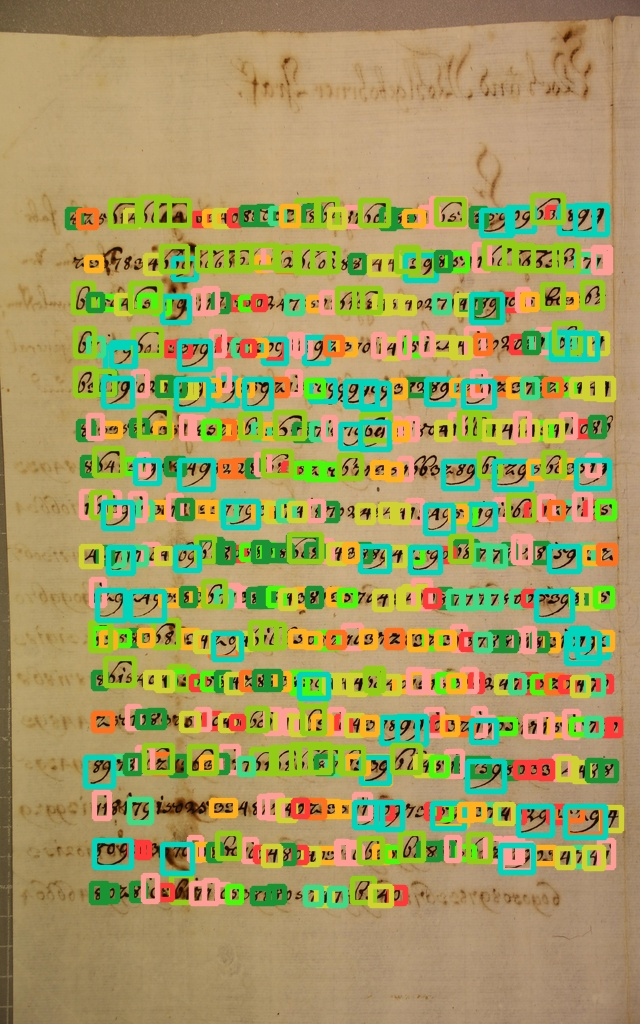

In [7]:
img = "yolo_v5/runs/detect/vega_road_det/IMG_1512.jpg"
display(Image(img))

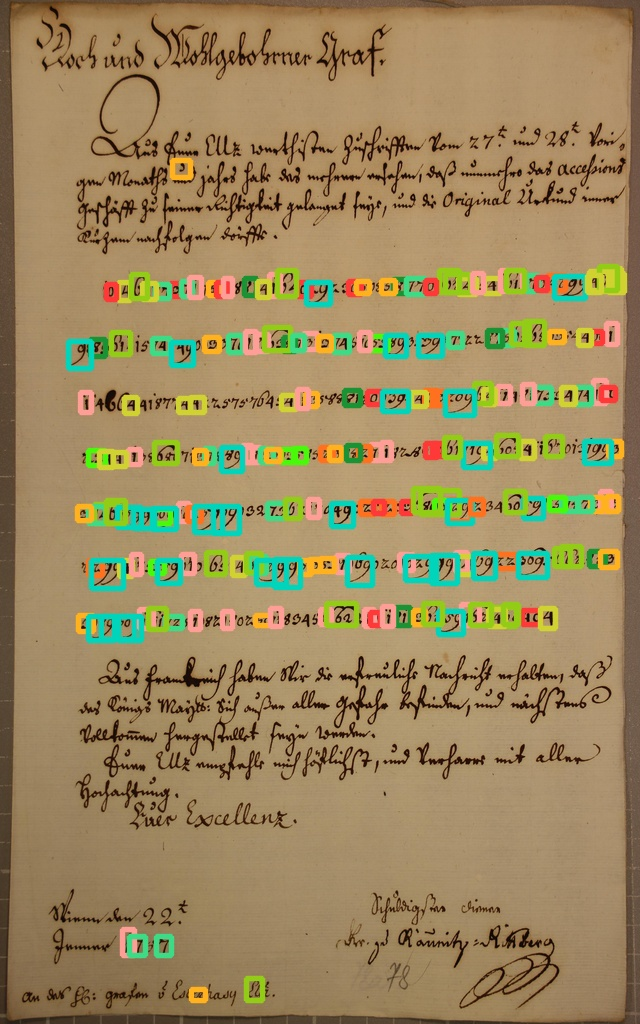

In [8]:
img = "yolo_v5/runs/detect/vega_road_det/IMG_1517.jpg"
display(Image(img))

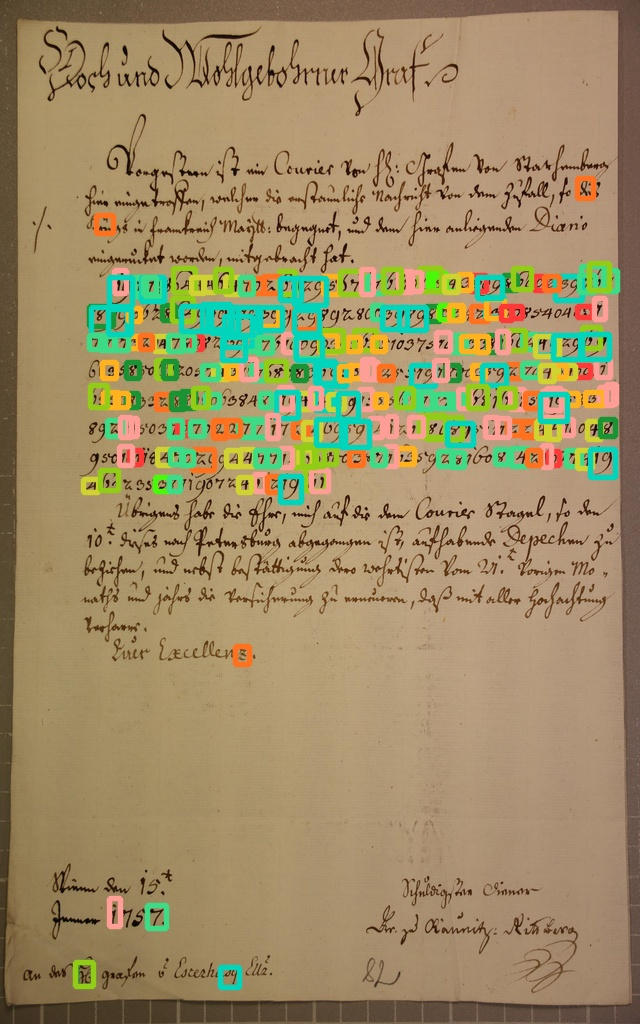

In [9]:
img = "yolo_v5/runs/detect/vega_road_det/IMG_1522.jpg"
display(Image(img))

### Detekcia na VEGA-cropped vzorkách:

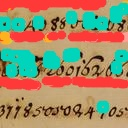

In [10]:
img = "yolo_v5/runs/detect/vega_road_det2/IMG_1512_col192_row192.jpg"
display(Image(img))

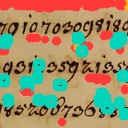

In [12]:
img = "yolo_v5/runs/detect/vega_road_det2/IMG_1512_col192_row320.jpg"
display(Image(img))

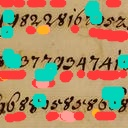

In [13]:
img = "yolo_v5/runs/detect/vega_road_det2/IMG_1512_col192_row448.jpg"
display(Image(img))

---
## Inferencia - klasifikácia:

### Klasifikácia na VEGA vzorke:

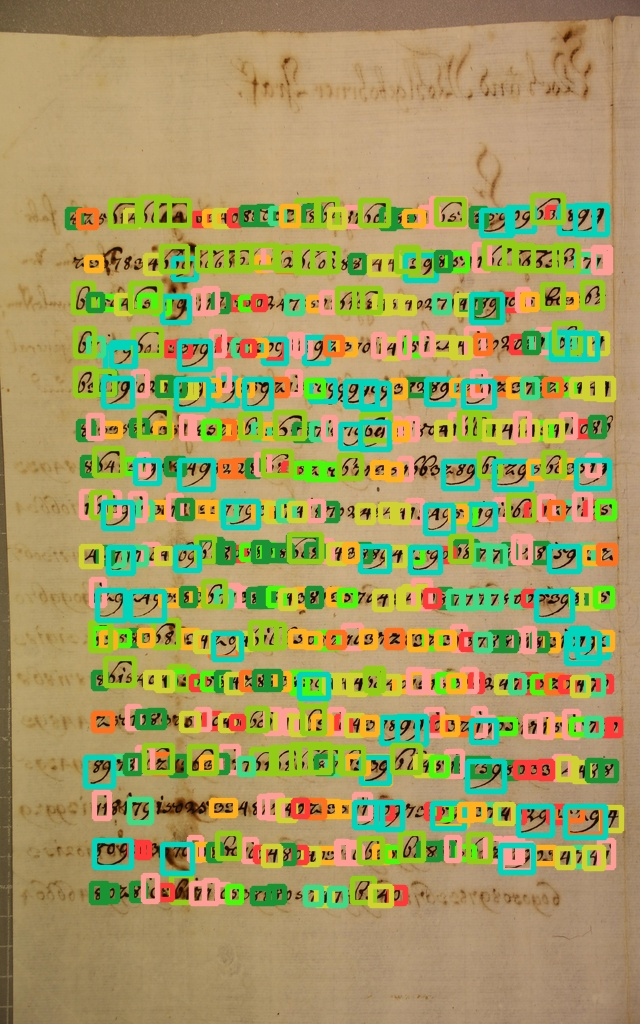

           xmin        ymin        xmax        ymax  confidence  class name
0     96.791260  590.305359  125.304909  620.329529    0.887790      9    9
1    209.504669  246.903030  250.911362  269.683685    0.885147      6    6
2    565.039429  806.269165  604.541565  837.326599    0.879362      9    9
3    302.368103  705.524658  323.866394  733.191162    0.877372      6    6
4    144.257080  745.054138  172.060059  772.121887    0.877185      6    6
5    396.061951  247.302200  417.943085  271.338867    0.875985      6    6
6    130.077881  282.914703  159.858185  311.276276    0.872379      6    6
7    583.745361  378.136902  601.740417  397.924164    0.866671      4    4
8    189.014572  746.108093  215.607300  773.047791    0.858581      6    6
9    111.017250  342.369598  134.678116  365.625336    0.856973      9    9
10   532.144714  195.106384  562.599060  222.037094    0.856643      6    6
11   263.218323  450.950775  290.924774  475.075195    0.856625      6    6
12   274.617

In [14]:
display(Image("yolo_v5/runs/detect/vega_road_det/IMG_1512.jpg"))
results = model("datasets/vega/document/test/IMG_1512.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())

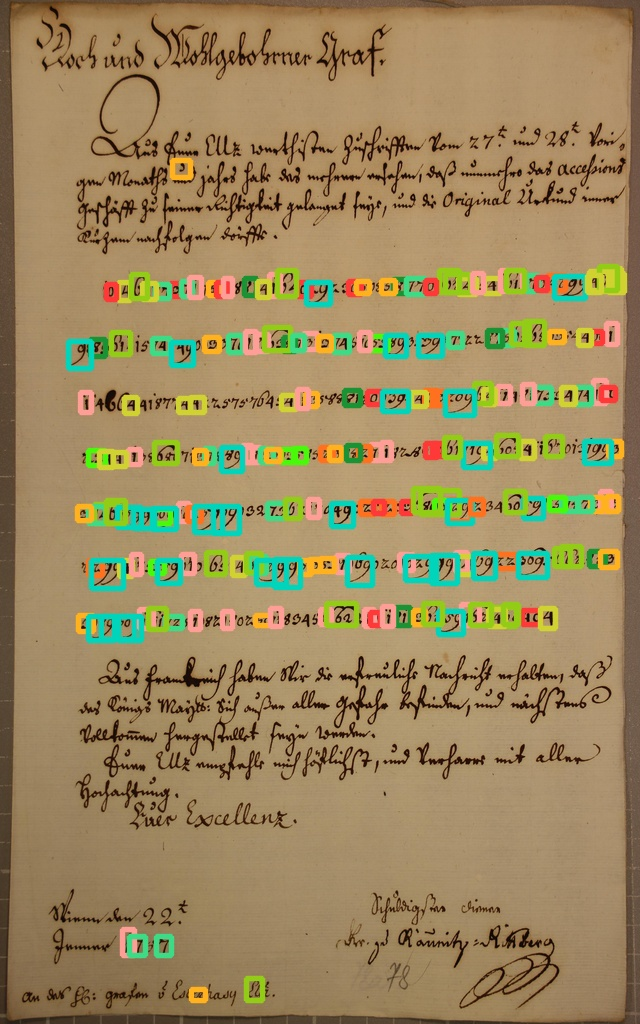

           xmin        ymin        xmax         ymax  confidence  class name
0    276.779327  269.696655  295.509491   295.716187    0.828566      6    6
1    412.715820  488.195282  439.504395   512.167725    0.796954      6    6
2    502.607483  603.594971  517.997498   624.213318    0.794268      6    6
3    131.431610  273.923920  147.244812   298.005341    0.787349      6    6
4    220.839584  447.302307  242.427902   470.866669    0.762751      9    9
5    148.026627  608.050293  165.780945   628.780762    0.757581      6    6
6    205.989578  551.860107  224.932541   573.781006    0.756335      6    6
7    212.845734  505.613861  239.458817   532.884399    0.745681      9    9
8    473.492493  552.767578  494.803223   578.353821    0.745201      9    9
9    505.256195  490.954834  525.253296   512.016785    0.743354      6    6
10   586.507812  274.851654  601.363770   291.528900    0.737643      4    4
11   156.505539  559.786316  180.342804   583.317871    0.735252      9    9

In [15]:
display(Image("yolo_v5/runs/detect/vega_road_det/IMG_1517.jpg"))
results = model("datasets/vega/document/test/IMG_1517.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())

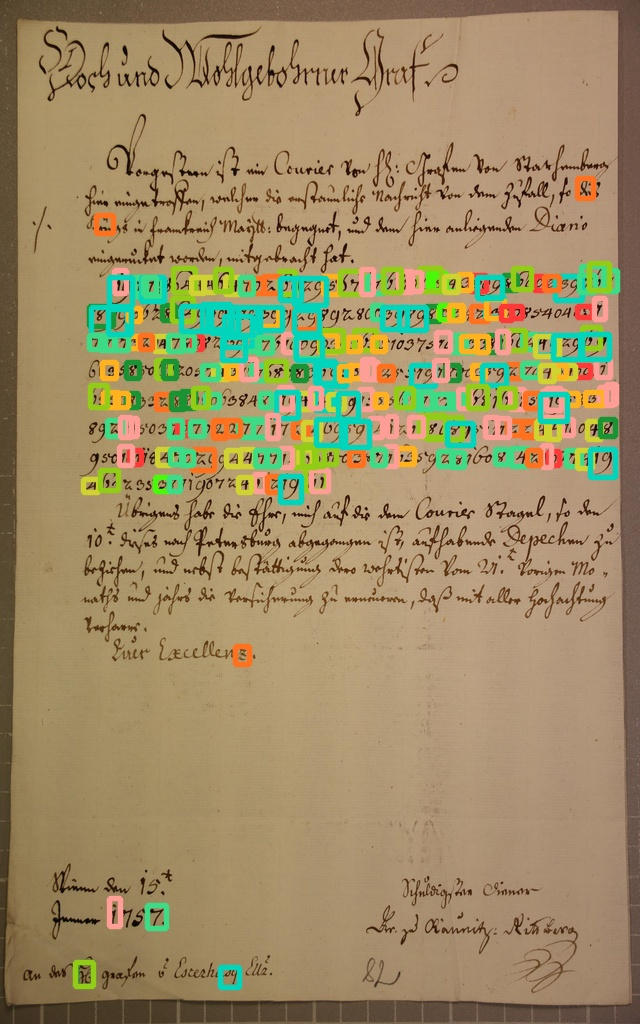

           xmin        ymin        xmax        ymax  confidence  class name
0    383.441193  268.638062  401.039459  291.731873    0.808514      6    6
1    513.082520  268.328796  531.303345  289.024261    0.780898      6    6
2    221.867538  337.338074  244.912216  359.602264    0.779787      9    9
3    279.784241  476.393799  300.797272  502.127106    0.772044      9    9
4    589.598511  449.264465  615.377380  477.105957    0.767639      9    9
5    180.596695  306.113800  208.133057  331.317963    0.761273      9    9
6    294.345825  277.883301  325.968872  304.836578    0.760119      9    9
7    600.338135  419.026367  614.501221  436.388275    0.757967      8    8
8    143.261276  276.951202  156.190491  293.966766    0.757863      7    7
9    214.867798  269.496490  231.105347  290.981049    0.756969      6    6
10   254.680695  450.342682  267.126892  466.142975    0.756644      7    7
11   257.300629  336.890045  271.911682  353.158051    0.756356      7    7
12   386.926

In [16]:
display(Image("yolo_v5/runs/detect/vega_road_det/IMG_1522.jpg"))
results = model("datasets/vega/document/test/IMG_1522.jpg")
pd_results = results.pandas().xyxy[0]
print(pd_results.to_string())